In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from termcolor import colored

In [2]:
x_train = tf.random.normal(shape=(1000,), dtype=tf.float32)
y_train = 3 * x_train + 1 + (tf.random.normal(shape=(1000,), dtype=tf.float32) * 0.2)

print(x_train.dtype, x_train.shape)
print(y_train.dtype, y_train.shape)

<dtype: 'float32'> (1000,)
<dtype: 'float32'> (1000,)


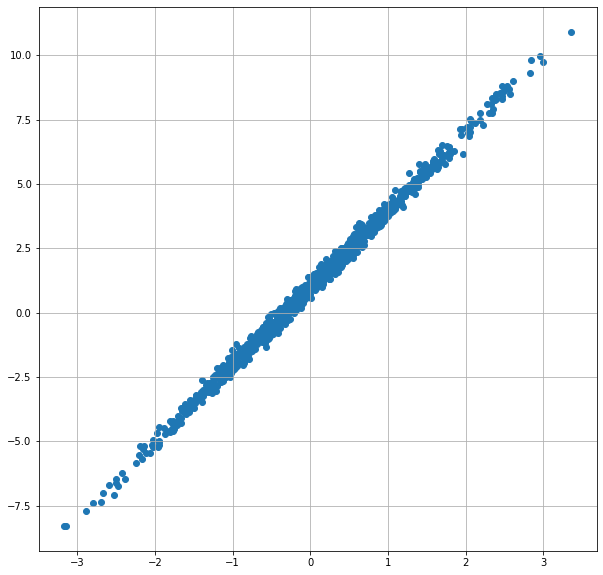

'\nactivation function이 없는 것이 linear function이다.\n'

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_train.numpy(), y_train.numpy())
ax.tick_params(labelsize=10)
ax.grid()

plt.show()

"""
activation function이 없는 것이 linear function이다.
"""

In [4]:
x_test = tf.random.normal(shape=(300,), dtype=tf.float32)
y_test = 3 * x_test + 1 + (tf.random.normal(shape=(300,), dtype=tf.float32) * 0.2)

print(x_test.dtype, x_test.shape)
print(y_test.dtype, y_test.shape)

<dtype: 'float32'> (300,)
<dtype: 'float32'> (300,)


In [5]:
# Sequential Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(loss='mean_squared_error', optimizer='SGD')

print(model)

In [6]:
model.fit(x_train, y_train, epochs=50, verbose=2)

Epoch 1/50
32/32 - 1s - loss: 8.6181
Epoch 2/50
32/32 - 0s - loss: 2.2492
Epoch 3/50
32/32 - 0s - loss: 0.6149
Epoch 4/50
32/32 - 0s - loss: 0.1896
Epoch 5/50
32/32 - 0s - loss: 0.0803
Epoch 6/50
32/32 - 0s - loss: 0.0517
Epoch 7/50
32/32 - 0s - loss: 0.0448
Epoch 8/50
32/32 - 0s - loss: 0.0431
Epoch 9/50
32/32 - 0s - loss: 0.0426
Epoch 10/50
32/32 - 0s - loss: 0.0425
Epoch 11/50
32/32 - 0s - loss: 0.0425
Epoch 12/50
32/32 - 0s - loss: 0.0425
Epoch 13/50
32/32 - 0s - loss: 0.0425
Epoch 14/50
32/32 - 0s - loss: 0.0425
Epoch 15/50
32/32 - 0s - loss: 0.0425
Epoch 16/50
32/32 - 0s - loss: 0.0425
Epoch 17/50
32/32 - 0s - loss: 0.0425
Epoch 18/50
32/32 - 0s - loss: 0.0425
Epoch 19/50
32/32 - 0s - loss: 0.0425
Epoch 20/50
32/32 - 0s - loss: 0.0425
Epoch 21/50
32/32 - 0s - loss: 0.0425
Epoch 22/50
32/32 - 0s - loss: 0.0425
Epoch 23/50
32/32 - 0s - loss: 0.0425
Epoch 24/50
32/32 - 0s - loss: 0.0425
Epoch 25/50
32/32 - 0s - loss: 0.0425
Epoch 26/50
32/32 - 0s - loss: 0.0425
Epoch 27/50
32/32 - 0

In [7]:
model.evaluate(x_test, y_test, verbose=2)

10/10 - 0s - loss: 0.0356


0.03557905927300453

In [8]:
# Model Sub-classing : Sequential 보다 advanced technic을 다루기에 더 용이하다.
class LinearPredictor(tf.keras.Model):
  def __init__(self):
    super(LinearPredictor, self).__init__()
    
    self.d1 = tf.keras.layers.Dense(units=1, activation='linear')
  
  def call(self, x):
    x = self.d1(x)
    return x

In [9]:
x_train = tf.random.normal(shape=(10,), dtype=tf.float32)
y_train = x_train * 3 + 1 + (tf.random.normal(shape=(10,), dtype=tf.float32) * 0.2)

x_test = tf.random.normal(shape=(3,), dtype=tf.float32)
y_test = x_test * 3 + 1 + (tf.random.normal(shape=(3,), dtype=tf.float32) * 0.2)

In [11]:
EPOCHS = 10
LR = 0.01

model = LinearPredictor()

loss_object = tf.keras.losses.MeanSquaredError() # compile 대신 loss object를 따로 선언
optimizer = tf.keras.optimizers.SGD(learning_rate=LR)

for epoch in range(EPOCHS):
  for x, y in zip(x_train, y_train):
    x = tf.reshape(x, (1, 1)) # x는 2차원으로 입력을 해주어야 함
    with tf.GradientTape() as tape:
      predictions = model(x)
      loss = loss_object(y, predictions) # 여기까지가 forward propagation
    
    gradients = tape.gradient(loss, model.trainable_variables) # gradients를 구하는 back propagation
    optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # parameter를 업데이트 하는 구간
  
  print(colored('Epoch: ', 'red', 'on_white'), epoch + 1)
  
  templates = 'Train Loss: {:.4f}\n'
  print(templates.format(loss))

Epoch:  1
Train Loss: 0.6715

Epoch:  2
Train Loss: 0.5540

Epoch:  3
Train Loss: 0.4584

Epoch:  4
Train Loss: 0.3806

Epoch:  5
Train Loss: 0.3171

Epoch:  6
Train Loss: 0.2653

Epoch:  7
Train Loss: 0.2230

Epoch:  8
Train Loss: 0.1883

Epoch:  9
Train Loss: 0.1598

Epoch:  10
Train Loss: 0.1364

